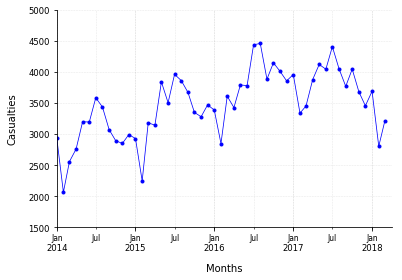

In [223]:
import pandas as pd
import pprint as pp
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt

def get_axes():
    df = pd.read_csv('../data/AllGunShootings.csv') 
    
    # insert casualties(killed AND injured) per incident
    df.insert(value = [kill + inj for kill, inj in zip(df['n_killed'], 
              df['n_injured'])], loc= df.shape[1], column = 'casualties')
    
    # set start values and constant
    old_month = '2014-01'
    casualties_num = 0
    incidents_num = 0
    casualties = []
    incidents = []
    columns = df.shape[0]
    months = []
    
    # iterate over rows
    for i in range(278, columns):
        
        # increase if month is the same
        if df.iloc[i, 2][:7] == old_month:
            casualties_num += df.iloc[i, 19]
            incidents_num += 1
        # gather data if new month is there
        else:
            casualties.append(casualties_num)
            months.append(matplotlib.dates.date2num(
                          datetime.strptime(old_month,'%Y-%m')))
            incidents.append(incidents_num)

            old_month = df.iloc[i, 2][:7]
            casualties_num = 0
            incidents_num = 0
    
    # append vals for last month
    casualties.append(casualties_num)
    incidents.append(incidents_num)
    months.append(matplotlib.dates.date2num(datetime.strptime(old_month,
                                                              '%Y-%m')))
    return [months, casualties]

def pretty_plot(x_vals, y_vals):
    
    # remove right and upper plot frame lines
    ax = plt.gca()
    ax.spines["top"].set_visible(False)      
    ax.spines["right"].set_visible(False)   
    
    # set axis parameters
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    ax.tick_params(pad=12, axis='x')
    ax.tick_params(axis='x', which='minor', labelsize=7.5)
    
    # set grid
    ax.grid(True, linewidth = 0.5, ls='--', alpha = 0.3, which='both')    
    
    # set limits 
    ax.set_ylim([1500,5000])
    ax.set_xlim([datetime.strptime('2014-01', '%Y-%m'), 
                 datetime.strptime('2018-04', '%Y-%m')])
    
    # set minor and major formatter/locater for dates
    ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator([1,7]))
    ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
    
    # set label text
    ax.set_xlabel("Months", fontsize = 10, labelpad=11)
    ax.set_ylabel("Casualties", fontsize = 10, labelpad=11)
    
    # plot and save
    ax.plot(x_vals, y_vals, '-bo', linewidth=0.75, markersize = 3.0)
    plt.savefig("../data/casualties_year.png", dpi=200, 
                bbox_inches="tight")

# axes = get_axes()
pretty_plot(axes[0], axes[1])    